# Read Image

- author : Sylvie Dagoret-Campagne
- date   : 22 Novembre 2018
- goal.  : read image

In [28]:
from astropy.io import fits

In [29]:
from os import listdir
from os.path import isfile, join,isdir
import os

In [30]:
import re

In [31]:
import pandas as pd
import numpy as np

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

# Config

In [32]:
DUMP_FLAG=True

In [33]:
!ls data

20180717   20181023   20181024   20181025   20181026   GetData.sh


# Where to search

In [34]:
topdir="data"

In [35]:
mypath=topdir

In [36]:
all_subdir= [f for f in listdir(mypath) if isdir(join(mypath, f)) ]

In [37]:
print all_subdir

['20180717', '20181023', '20181024', '20181025', '20181026']


In [38]:
subdir=all_subdir[4]

In [39]:
mypath=os.path.join(topdir,subdir)

In [40]:
only_image_files = [f for f in listdir(mypath) if isfile(join(mypath, f)) and re.search('[.]fz$',f) ]

In [41]:
print only_image_files

['10_CCD1_20181026114351.fz', '10_CCD1_20181026114506.fz', '10_CCD1_20181026114705.fz', '10_CCD1_20181026114914.fz', '10_CCD1_20181026150347.fz']


In [69]:
all_hdus=[]
all_img=[]
all_hd=[]
for fits_image_filename in only_image_files:
    print '********************************************************************************'
    fullfilename=os.path.join(mypath,fits_image_filename)
    with fits.open(fullfilename) as hdus:
        hdus.info()
        all_hd.append(hdus[0].header)
        all_ampl=[]
        for index in np.arange(1,17):
            all_ampl.append(hdus[index].data)
        all_img.append(all_ampl)

********************************************************************************
Filename: data/20181026/10_CCD1_20181026114351.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   ()      
  1  CHAN_00       1 CompImageHDU     21   (576, 2048)   int32   
  2  CHAN_01       1 CompImageHDU     21   (576, 2048)   int32   
  3  CHAN_02       1 CompImageHDU     21   (576, 2048)   int32   
  4  CHAN_03       1 CompImageHDU     21   (576, 2048)   int32   
  5  CHAN_04       1 CompImageHDU     21   (576, 2048)   int32   
  6  CHAN_05       1 CompImageHDU     21   (576, 2048)   int32   
  7  CHAN_06       1 CompImageHDU     21   (576, 2048)   int32   
  8  CHAN_07       1 CompImageHDU     21   (576, 2048)   int32   
  9  CHAN_08       1 CompImageHDU     21   (576, 2048)   int32   
 10  CHAN_09       1 CompImageHDU     21   (576, 2048)   int32   
 11  CHAN_10       1 CompImageHDU     21   (576, 2048)   int32   
 12  CHAN_11       1 CompImage

In [73]:
NBIMG=len(all_hd)

In [75]:
selected_image=0

In [76]:
imgs=all_img[selected_image]

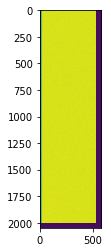

In [92]:
plt.imshow(imgs[15])